<div><img src="https://github.com/digitalearthpacific/DigitalEarthPacific/blob/main/notebooks/DEP_LCAST/reference_materials/images/1B/1.a.png?raw=true" width="800"/></div>


# Activity Notebook Introduction to Digital Earth Pacific Abstraction Libary (DEPAL)
This notebook is intended for users of Digitial Earth Pacific in Cook Islands. The notebook provides the foundations of Python more broadly and should you wish to look at fundamentals of python please refer to activity notebook **'Python Foundations'**. This activity notebook  **'Cooks Intro to DEPAL'** includes the introduction to [Digital Earth Pacific (DEP)](https://github.com/digitalearthpacific/DigitalEarthPacific/tree/main) and will be working with Python within a Jupyter Notebook environment as the IDE. 

For questions regarding this notebook and/ or other products by Digital Earth Pacific please contact the DEP SPC team at dep@spc.int

### Digital Earth Pacific (DEP) Notebook

Run the set of import codes below to set up your Digital Earth Pacific (DEP) environment by clicking on the run icon or by pressing "Shift" "Enter".

In [1]:
import sys
sys.path.append('../../')
import depal_mh as dep
import warnings
warnings.filterwarnings('ignore')

import geopandas as gpd
import numpy as np
import odc.geo.xr  # noqa: F401
import pandas as pd
import xarray as xr
from odc.stac import load
from pystac_client import Client
from shapely import geometry

<font color='blue'>1.1. Countries within Digital Earth Pacific Abstraction Library

Your code goes in the cells below. Add more cells here by clicking on the + button above.

First let's list out the countries covered within Digital Earth Pacific (DEP) using the following command:  

> `dep.list_countries()`

- Where *dep.* is the module   
- *list_countries()* is the function that converts requests or simple operations into an object. 

***Copy and paste the command from above in the cell below to extract the list of countries covered within the DEP module.***

In [2]:
dep.list_countries()

,0
0,American Samoa
1,Cook Islands
2,Fiji
3,French Polynesia
4,Guam
5,Kiribati
6,Marshall Islands
7,Micronesia
8,Nauru
9,New Caledonia


<font color='blue'>Boundary Types

Now let's learn what boundary type are available for your chosen country using the following command:

> `dep.list_boundary_types('insert selected country from output above')`

***Copy and paste the command from above in the cell below to explore the types of boundaries avaible for your country within the DEP module.***


In [5]:
dep.list_boundary_types('Cook Islands')

,0
0,Island Council


<font color='blue'> Admin Boundaries 

Now let's learn what admin boundaries are available for your country of interest using the following code: 

> `dep.list_country_boundary('Cook Islands', 'insert boundary type from output above')`

***Copy and paste the command from above in the cell below to explore the admin boundaries avaible for your country within the DEP module.*** 


In [6]:
dep.list_country_boundary('Cook Islands', 'Island Council')

,0
0,Aitutaki
1,Atiu
2,Mangaia
3,Manihiki
4,Mauke
5,Mitiaro
6,Palmerston
7,Penhryn
8,Pukapuka
9,Rakahanga


<font color='blue'>1.2. Select Area of interest (AOI)

The list you have generated above is an example of how to call on default values stored within a library. All of these oundaries are based on official Government data and assumed to be correct and up-to-date. 

Now that you have the list of admin boundaries, you can try to access one of these datasets by calling it. This will load the data and configure it to be your area of interest for further analysis in depal. In order to do this, we can use the following command: 
    
> `dep.get_country_admin_boundary('Cook Islands', 'Island Council', 'insert admin aboundary selected from output above')` 

First type the module 'dep.' then type the function 'get_country_admin_boundary' then within the brackets you can search for a particular subset of the total list above. You can choose one from the list above and don't forgot to place it between quotations: e.g. "Mauke".

Note: this will generate a long list of coordinates that map out the boundary. 

In [7]:
dep.get_country_admin_boundary('Cook Islands', 'Island Council', 'Mauke')

0    POLYGON ((-157.32388 -20.17972, -157.32584 -20.18167, -157.32639 -20.18167, -157.32684 -20.18155, -157.32739 -20.18172, -157.32748 -20.18176, -157.32816 -20.18207, -157.32866 -20.18264, -157.32928 -20.18323, -157.33012 -20.18382, -157.33081 -20.18408, -157.33157 -20.18455, -157.33209 -20.18512, -157.33276 -20.18554, -157.33289 -20.18562, -157.33311 -20.18581, -157.33366 -20.18629, -157.33444 -20.18697, -157.33456 -20.18707, -157.33539 -20.18781, -157.33662 -20.18844, -157.33672 -20.18844, -157.33820 -20.18848, -157.33911 -20.18903, -157.33958 -20.18929, -157.34082 -20.18970, -157.34138 -20.18972, -157.34167 -20.18944, -157.34222 -20.18944, -157.34250 -20.18918, -157.34258 -20.18917, -157.34334 -20.18917, -157.34351 -20.18903, -157.34367 -20.18889, -157.34389 -20.18889, -157.34442 -20.18829, -157.34552 -20.18829, -157.34671 -20.18727, -157.34680 -20.18719, -157.34692 -20.18717, -157.34778 -20.18701, -157.34836 -20.18662, -157.34888 -20.18622, -157.34930 -20.18573, -157.35005 -20.18

<font color='blue'>1.3. Define a Variable

To make it easier to use this dataset going forward through the activity, you can define it with a variable. 
    
To do this, assign the command from above to a variable name. The variable name can be the name of the island/ admin boundary you've chosen: e.g. Mauke. 
    
For example:
    
> `Mauke = dep.get_country_admin_boundary('Cook Islands', 'Island Council', 'Mauke')`
    
This new variable allows you to store the results from above and easily use them going forward. 


In [8]:
Mauke = dep.get_country_admin_boundary('Cook Islands', 'Island Council', 'Mauke')

<font color='blue'>1.4. Visualising AOI with an Interactive Map

Now that you have selected and saved an area of interest, you can now visualise this data in an interactive map using the leafmap functionality within Python notebooks. This function has been wrapped and simplified in DEP using the **explore()** function. 

Try to input your area of interest variable followed by the function as such: 
    
> `varibale name from above.explore()`
    
Once your map has loaded, explore the interactivity by scrolling in and out and panning around to different areas of the basemap.
    

In [9]:
Mauke.explore()

<font color='blue'>2. Practicing the Workflow

Now through this workflow using the commands and functions you've learned above to visualise a different part of Cook Islands. 
    
1. List the boundary datasets available for Cook Islands
2. List the types of boundaries available in Cook Islands
3. List the admin boundaries available for the type of boundary
4. Select your area of interest
5. Define this boundary dataset within a new variable
6. Explore this boundary dataset within an interactive map

Practice this workflow by repeating these steps but this time, choose a different boundary from the same or even a different country. 



<font color='blue'> Cheatcodes

> `dep.list_countries()`

>`dep.list_boundary_types('Country Name')`

> `dep.list_country_boundary('Cook Islands', 'Boundary Type')`

> `dep.get_country_admin_boundary('Cook Islands', 'Boundary Type', 'AOI')`

> `AOI Name = dep.get_country_admin_boundary('Cook Islands', 'Boundary Type', 'AOI')`

> `AOI Name.explore()`


In [11]:
Raro = dep.get_country_admin_boundary('Cook Islands', 'Island Council', 'Rarotonga')
Raro.explore()

<font color='blue'>3. Custom AOI's

While it is useful to perform analysis within government administrative boundaries, we may also have work requiring us to perform analysis within custom boundaries or "areas of interest (AOIs)". In this activity you will learn how to use a custom area of interest and how to upload your own geojson for the analysis:


<font color='blue'>3.1. Add a Geojson

If you have your own geojson file for an aoi already, you can simply drag and drop it into this Cooks folder you are currently in - if you do not have a .geojson file already, you can use one we have prepared earlier:   

> Cook_Islands/Areoa.geojson

> Cook_Islands/Mauke.geojson

Try double clicking on your geojson file within the folder to open it and to verify that it is the area that you are seeking to analyse.


<font color='blue'>3.2. Loading Geojson 
    
To load this geojson area into your current script use the function: 
    
> `dep.get_area_from_geojson("Folder Name/File Name")` 
    
Note, do not forget to place your file name within quotations "..." including the extension .geojson
    
***Copy and paste the command from above with your additions in the cell below to load your geojson file.*** 

In [ ]:
dep.get_area_from_geojson("Cook_Islands/Mauke.geojson")

<font color='blue'>3.3. Define AOI

To do this, assign the command from above to a variable name. The variable name can be the name of the island you've chosen: e.g. Mauke. 

Ensure the variable name is not repeated from above, that if if your first AOI was called Mauke, ensure your new AOI isn't also called Mauke. 

In [ ]:
Mauke2 = dep.get_area_from_geojson("Cook_Islands/Mauke.geojson")

<font color='blue'>3.4 Visualise Geojson 

Now that you have a new AOI, use the **explore()** function you learnt earlier to visualise your AOI in a leaflet. 

Remember to input your area of interest variable followed by the function as such: 
    
> `varibale name from above.explore()`
    
Once your map has loaded, explore the interactivity by scrolling in and out and panning around to different areas of the basemap.

In [ ]:
Mauke2.explore()

<font color='blue'>3.5 Repeat Workflow

Repeat the above steps and visualise a different AOI available in your folder. 
1. Add a .geojson file to your folder
2. Load .geojson file in your script
3. Define AOI
4. Visalise AOI using explore() funtion

**BONUS ACTIVITY**
1. Create your own AOI at [Geojson.io](https://geojson.io/#map=2/0/20) and download it as a geojson file. 
2. Repeat steps from above. 


#### **<font color='green'>Well done...**

You have learned how to set up your area of interest in depal. Now we will begin working with the satellite imagery data. 

Note that there are a range of different datasets and models. For this activity we are most interested in the **Sentinel 2** dataset. 
This data has been pre-processed as a GeoMAD product for use in this workshop. This will be explained in the workshop. 

### <font color='blue'>Learning about the European Space Agency Sentinel 2 Satellite.</font>
<font color = 'blue' ></font>

The main satellite data we will be using for this workshop is from the Copernicus Sentinel 2 satellite dataset as shown in figure s.2.a. 

<div><img src="https://github.com/digitalearthpacific/DigitalEarthPacific/blob/main/notebooks/DEP_LCAST/reference_materials/images/1B/Sentinel.1.jpg?raw=true" width="600"/></div>


**Figure S.2.a. Provides an Overview of Sentinel 2 Satellite**

The table in figure S.2.b. provides a list of the different bands or spectral wavelengths captured by the Sentinel 2 satellite. We will be using these for our analyses within the workshop. 

The bands are measured in wavelengths with unit measurements of nanometers. Visible light is measured in nanometers (nm). A nanometer is a unit of length equal to one billionth of a meter.

<font color='blue'>4.1. Spectral Bands

These include optical bands we can see with the human eye:
- (B2) Blue = 458-523 nm
- (B3) Green = 543-578 nm 
- (B4) Red = 650-680 nm

And infrared bands that cannot be detected by the human eye:
- (B8) Near Infrared or NIR = 785-900 nm
- (B11) Shortwave Infrared 1 or SWIR 1 = 1565-1655 nm

For the full list see Figure S.2.b.

<div><img src="https://github.com/digitalearthpacific/DigitalEarthPacific/blob/main/notebooks/DEP_LCAST/reference_materials/images/1B/Sentinel.2.png?raw=true="600" width="580"/></div>  

Figure S.2.b. Table list of spectral bands captured by sensors on the Sentinel 2 satellite

A visualisation of these bands from the table in S.2.b. is visualised as a spectrum in figure S.2.c.
    
    
    
    
    
<div><img src="https://github.com/digitalearthpacific/DigitalEarthPacific/blob/main/notebooks/DEP_LCAST/reference_materials/images/1B/Sentinel.3.jpg?raw=true="600" width="580"/></div>    

Figure S.2.c. The spectrum of different wavelengths visualised:

In [30]:
## find the dataset names first. 
dep.list_data_sources()

,0,1
0,3dep-lidar-classification,USGS 3DEP Lidar Classification
1,3dep-lidar-copc,USGS 3DEP Lidar Point Cloud
2,3dep-lidar-dsm,USGS 3DEP Lidar Digital Surface Model
3,3dep-lidar-dtm,USGS 3DEP Lidar Digital Terrain Model
4,3dep-lidar-dtm-native,USGS 3DEP Lidar Digital Terrain Model (Native)
5,3dep-lidar-hag,USGS 3DEP Lidar Height above Ground
6,3dep-lidar-intensity,USGS 3DEP Lidar Intensity
7,3dep-lidar-pointsourceid,USGS 3DEP Lidar Point Source
8,3dep-lidar-returns,USGS 3DEP Lidar Returns
9,3dep-seamless,USGS 3DEP Seamless DEMs


List the different satellite imagery datasets here:

In [9]:
dep.list_data_sources()

,0,1
0,3dep-lidar-classification,USGS 3DEP Lidar Classification
1,3dep-lidar-copc,USGS 3DEP Lidar Point Cloud
2,3dep-lidar-dsm,USGS 3DEP Lidar Digital Surface Model
3,3dep-lidar-dtm,USGS 3DEP Lidar Digital Terrain Model
4,3dep-lidar-dtm-native,USGS 3DEP Lidar Digital Terrain Model (Native)
5,3dep-lidar-hag,USGS 3DEP Lidar Height above Ground
6,3dep-lidar-intensity,USGS 3DEP Lidar Intensity
7,3dep-lidar-pointsourceid,USGS 3DEP Lidar Point Source
8,3dep-lidar-returns,USGS 3DEP Lidar Returns
9,3dep-seamless,USGS 3DEP Seamless DEMs


<font color='blue'>4.1.a. Sentinel 2 Satellite Spectral Bands:  

> use the library `dep.`

> use the function `list_data_bands`

> input the arguments by listing the dataset of interest `('sentinel-2-l2a')`

In [28]:
dep.list_data_bands('sentinel-2-l2a')

,name,description,gsd,common_name,center_wavelength,full_width_half_max
0,AOT,aerosol optical thickness,NaN,NaN,NaN,NaN
1,B01,coastal aerosol,60.0,coastal,0.443,0.027
2,B02,visible blue,10.0,blue,0.490,0.098
3,B03,visible green,10.0,green,0.560,0.045
4,B04,visible red,10.0,red,0.665,0.038
5,B05,vegetation classification red edge,20.0,rededge,0.704,0.019
6,B06,vegetation classification red edge,20.0,rededge,0.740,0.018
7,B07,vegetation classification red edge,20.0,rededge,0.783,0.028
8,B08,near infrared,10.0,nir,0.842,0.145
9,B8A,vegetation classification red edge,20.0,rededge,0.865,0.033


<font color='blue'>4.1.b. Landsat Satellite Spectral Bands:  

> use the library `dep.`

> use the function `list_data_bands`

> input the arguments by listing the dataset of interest `('landsat-c2-l2')`

In [31]:
dep.list_data_bands('landsat-c2-l2')

,name,common_name,description,center_wavelength,full_width_half_max
0,TM_B1,blue,Visible blue (Thematic Mapper),0.49,0.07
1,TM_B2,green,Visible green (Thematic Mapper),0.56,0.08
2,TM_B3,red,Visible red (Thematic Mapper),0.66,0.06
3,TM_B4,nir08,Near infrared (Thematic Mapper),0.83,0.14
4,TM_B5,swir16,Short-wave infrared (Thematic Mapper),1.65,0.20
5,TM_B6,lwir,Long-wave infrared (Thematic Mapper),11.45,2.10
6,TM_B7,swir22,Short-wave infrared (Thematic Mapper),2.22,0.27
7,ETM_B1,blue,Visible blue (Enhanced Thematic Mapper Plus),0.48,0.07
8,ETM_B2,green,Visible green (Enhanced Thematic Mapper Plus),0.56,0.08
9,ETM_B3,red,Visible red (Enhanced Thematic Mapper Plus),0.66,0.06


<font color='blue'>4.2. Annual Red Green and Blue (RGB) data 
    
Now we can get our most recent satellite data using depal for our predefined aoi. The function to load the red green and blue bands of satellite data is as follows:

> `dep.get_latest(aoi)`
    
**Copy and paste the command from above with your additions in the cell below.**

For the first input within the brackets you will first need to input your own aoi variable where it says 'aoi'. The results should show you how many images were found. 

In [ ]:
dep.get_latest_images(Mauke2)

<font color='blue'>4.3 Define Another Variable:

Use the = sign to assign a varibale name to store your results from above. 

In [37]:
Mauke2_images = dep.get_latest_images(Mauke2)

['08/08/2024 23:12:39', '08/08/2024 23:12:39', '08/08/2024 23:12:39', '08/03/2024 23:12:31', '08/03/2024 23:12:31', '08/03/2024 23:12:31', '08/03/2024 23:12:31', '06/19/2024 23:12:29', '06/19/2024 23:12:29', '06/19/2024 23:12:29', '06/09/2024 23:12:39', '05/20/2024 23:12:29', '05/20/2024 23:12:29', '05/20/2024 23:12:29', '03/26/2024 23:12:31', '03/21/2024 23:12:29', '03/21/2024 23:12:29', '03/06/2024 23:12:31', '01/01/2024 23:12:29', '01/01/2024 23:12:29']
Images Found    : 20
Analysis Period : daily


<font color='blue'>4.3 Visualise Data
    
Plotting this data will allow you to see the results. Here we use :
    
> `dep.visualise(data, cmap=None)` 
    
Where data is the variable you defined above. 

Note this will generate a series of satellite imagery data for 2024 since you have loaded the most recent data. In the next activities we will be learning how to generate more data across different timescales.  

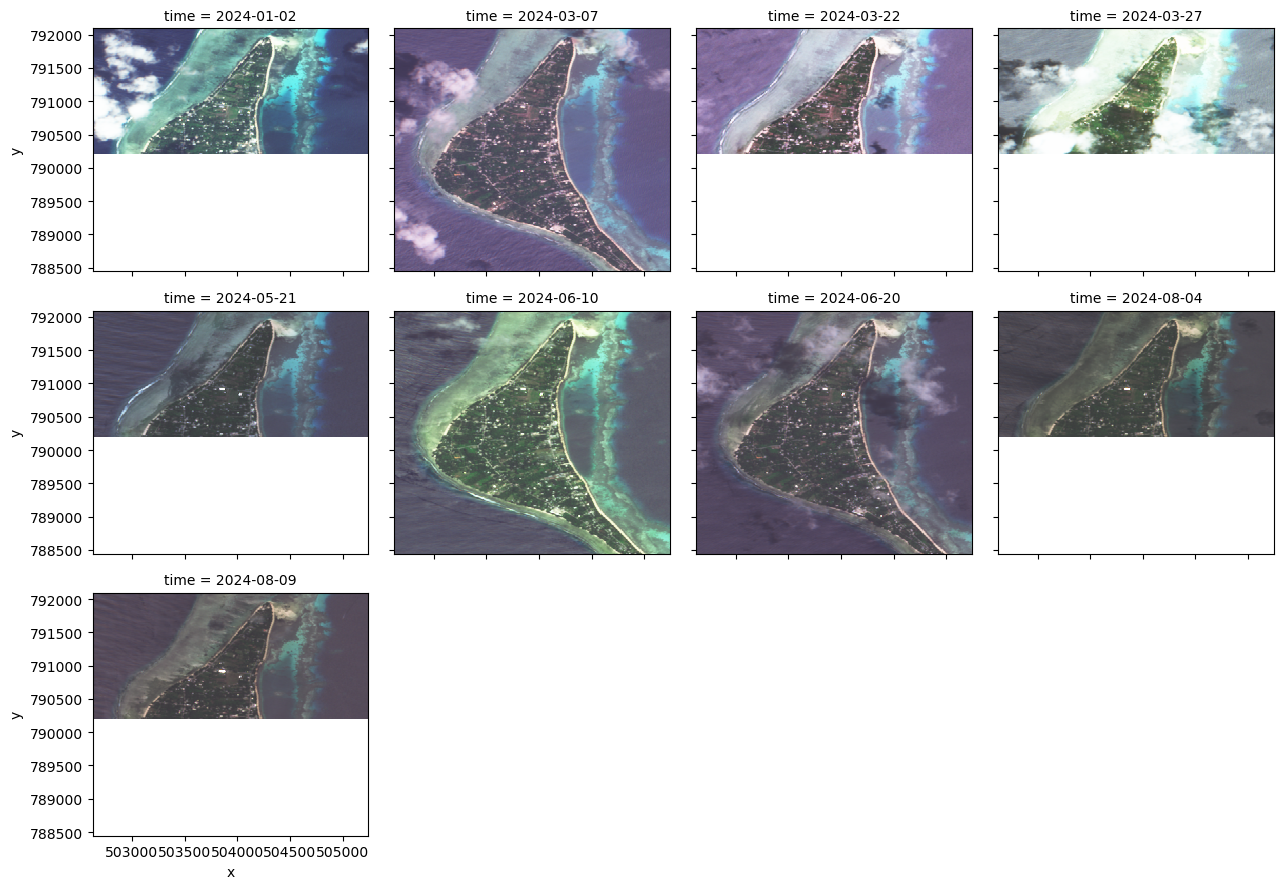

In [38]:
dep.visualise(Mauke2_images, cmap=None)

#### **<font color='green'>Congratulations you have now completed the intro to depal notebook activity.**